# Visualization with Plotly for Beginners

In this notebook, you will learn how to use the Plotly library. With what you have learned in this notebook, you will be able to create your own interactive graphics using Plotly.

Plotly is a library that contains various functions for data visualization and dashboards that are compatible with R and Python languages. Using these functions, you can get interactive graphics instead of classical graphics. This library is adapted for working in interactive web applications. It is a good solution for displaying your graphics, especially on a web-based page.

[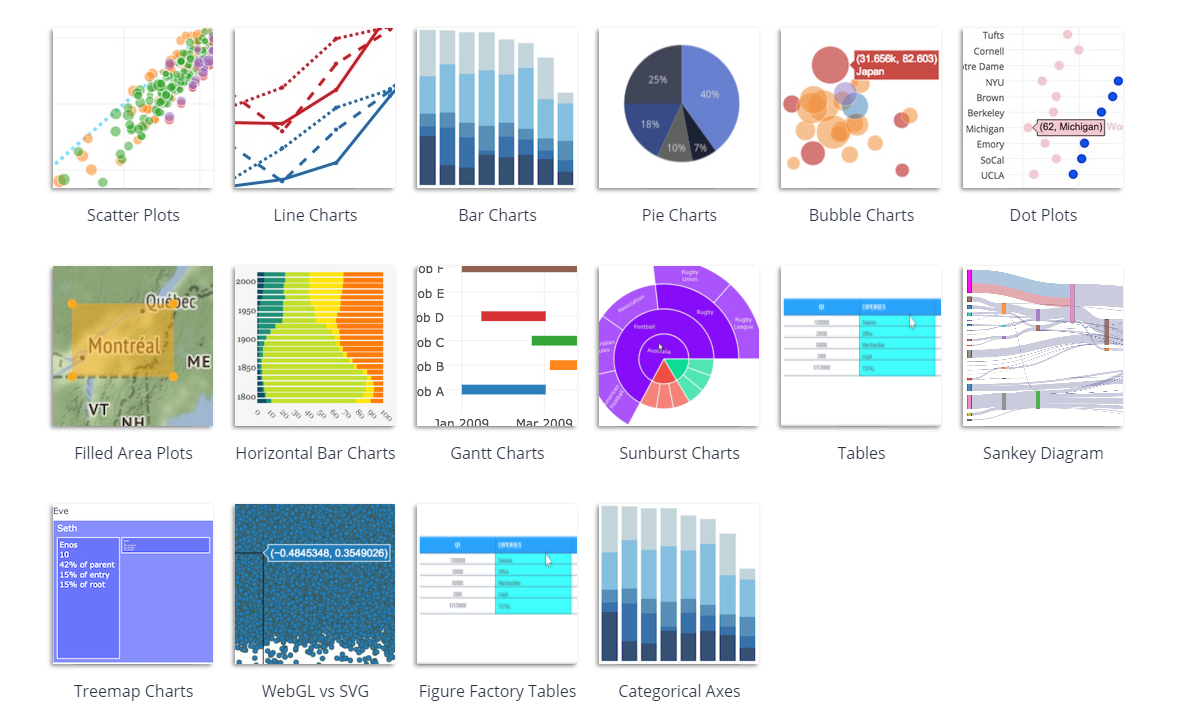](http://)

**Content**
1. [Read Datas & Explanation of Features & Information About Datasets](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Read-Datas-&-Explanation-of-Features-&-Information-About-Datasets)
2. [Scatter Plots](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Scatter-Plots)
3. [Map Plots](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Map-Plots)
4. [Line Plots](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Line-Plots)
5. [Sunburst Charts](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Sunburst-Charts)
6. [Bar Charts](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Bar-Charts)
7. [Bubble Charts](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Bubble-Charts)
8. [3D Scatter Plot with Colorscaling](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#3D-Scatter-Plot-with-Colorscaling)
9. [Word Clouds](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Word-Clouds)
10. [Pie Charts](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Pie-Charts)
11. [Treemap Charts](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Treemap-Charts)
12. [Multiple Subplots](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Multiple-Subplots)
13. [Conclusion](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/#Conclusion)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


*Importing libraries*

In [2]:
import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read Datas & Explanation of Features & Information About Datasets

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

From: https://www.kaggle.com/unsdsn/world-happiness

In [3]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
year2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv', encoding="windows-1252")
year2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv', encoding="windows-1252")
year2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv', encoding="windows-1252")

Explanation of Features for year2015:
* **Country -->** Name of the country.
* **Region -->** Region the country belongs to.
* **Happiness Rank -->** Rank of the country based on the Happiness Score.
* **Happiness Score -->** A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **Standard Error -->** The standard error of the happiness score.
* **Economy (GDP per Capita) -->** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Family -->** The extent to which Family contributes to the calculation of the Happiness Score
* **Health (Life Expectancy) -->** The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom -->** The extent to which Freedom contributed to the calculation of the Happiness Score.	 
* **Trust (Government Corruption) -->**	The extent to which Perception of Corruption contributes to Happiness Score.
* **Generosity -->** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Dystopia Residual -->** The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [4]:
year2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [5]:
year2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Explanation of Features for year2016:
* **Country -->** Name of the country.
* **Region -->** Region the country belongs to.
* **Happiness Rank -->** Rank of the country based on the Happiness Score.
* **Happiness Score -->** A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **Lower Confidence Interval -->** Lower Confidence Interval of the Happiness Score
* **Upper Confidence Interval -->** Upper Confidence Interval of the Happiness Score
* **Economy (GDP per Capita) -->** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Family -->** The extent to which Family contributes to the calculation of the Happiness Score
* **Health (Life Expectancy) -->** The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom -->** The extent to which Freedom contributed to the calculation of the Happiness Score.	 
* **Trust (Government Corruption) -->**	The extent to which Perception of Corruption contributes to Happiness Score.
* **Generosity -->** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Dystopia Residual -->** The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [6]:
year2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [7]:
year2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Explanation of Features for year2017:
* **Country -->** Name of the country.
* **Happiness Rank -->** Rank of the country based on the Happiness Score.
* **Happiness Score -->** A metric measured in 2017 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **Whisker.high -->** 
* **Whisker.low -->** 
* **Economy..GDP.per.Capita. -->** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Family -->** The extent to which Family contributes to the calculation of the Happiness Score
* **Health.Life.Expectancy. -->** The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom -->** The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Generosity -->** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Trust (Government Corruption) -->**	The extent to which Perception of Corruption contributes to Happiness Score.
* **Dystopia Residual -->** The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [8]:
year2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [9]:
year2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Explanation of Features for year2018:
* **Overall Rank -->** Rank of the country based on the Happiness Score.
* **Country or region -->** Name of the country.
* **Score -->** A metric measured in 2018 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **GDP per Capita -->** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Social support -->** 
* **Health Life Expectancy. -->** The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom to make life choices -->** The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Generosity -->** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Perceptions of corruption -->**	The extent to which Perception of Corruption contributes to Happiness Score.

In [10]:
year2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [11]:
year2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Explanation of Features for year2019:
* **Overall Rank -->** Rank of the country based on the Happiness Score.
* **Country or region -->** Name of the country.
* **Score -->** A metric measured in 2017 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **GDP per Capita -->** The extent to which GDP contributes to the calculation of the Happiness Score.
* **Social support -->** 
* **Health Life Expectancy. -->** The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom to make life choices -->** The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Generosity -->** The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Perceptions of corruption -->**	The extent to which Perception of Corruption contributes to Happiness Score.

In [12]:
year2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [13]:
year2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


***We have 1 NaN variable on the dataset 'year2018'. We must replace it with 0 in order not to cause problems in visualization.***

In [14]:
year2018['Perceptions of corruption'] = year2018['Perceptions of corruption'].fillna(0)

In [15]:
year2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


**Datasets are ready to being visualize. Let's Start!**

# Scatter Plots

The scatter plots helps you find possible relationships between values and outliers in datasets.

**Pros:** The scatter plot is a great way to visualize the correlation of two or more calculations at the same time. The third calculation is an effective way to highlight values and make it easier to identify items.

**Cons:** The scatter chart may not be easily understood by inexperienced users as it has the measure value in both axes and the optional third measure adds complexity to the interpretation. Make sure a novice user can interpret the scatter plot correctly. Using descriptive labels is an effective way to make the visualization easier to interpret. The values can be overlaid on each other and not visible until you zoom in.

* TRACE
  * x --> x axis
  * y --> y axis
  * mode --> how points are displayed
  * name --> name of the color (i.e.: red for 2015, green for 2016..)
  * marker --> color
  * text --> Text that show when yo came on to a dot. (In this ex: Country name)
* data --> sum of traces
* layout --> layout of the graphic.
* fig --> combines data and layout
* iplot() --> shows the figure

In [16]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
year2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv', encoding="windows-1252")
year2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv', encoding="windows-1252")
year2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv', encoding="windows-1252")

# prepare data frames
df2015 = year2015.iloc[:20,:]
df2016 = year2016.iloc[:20,:]
df2017 = year2017.iloc[:20,:]
df2018 = year2018.iloc[:20,:]
df2019 = year2019.iloc[:20,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    #line = dict(color='firebrick', width=4, dash='dot'),
                    text= df2015.Country)
# creating trace2
trace2 =go.Scatter(
                    x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df2016.Country)
# creating trace3
trace3 =go.Scatter(
                    x = df2015['Country'],
                    y = df2017['Happiness.Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'blue'),
                    text= df2017.Country)

# creating trace4
trace4 =go.Scatter(
                    x = df2015['Country'],
                    y = df2018['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df2017.Country)

# creating trace5
trace5 =go.Scatter(
                    x = df2015['Country'],
                    y = df2019['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df2017.Country)


data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Happiness Rate Changing 2015 to 2019 for Top 20 Countries',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

***What did we do??***

* We have placed each year's 'Happiness Score' on the y-axis.
* We setted a color for each year.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

**HOVER:** The text box that appears when you hover over the dots.

# Map Plots

Coroplet Maps are used to show geographic regions or areas separately. The visualization of the map is formatted or shaded according to the data. This feature provides the opportunity to visualize values according to their differences in a geographic map.

Data variables are used for each region in the map in coloring processes. To put it simply, this geographical map is transparent, light or dark, with the possibility to create mixtures and nuances in the entire spectrum of colors; offers a lot of design possibilities to the user.

* DATA
  * type --> type of the map
  * colorscale --> palette
  * marker_line_width --> width of border line of countries
  * locations --> locations from dataset
  * locationmode --> locations created via country names
  * z --> graph will show this. density.
  * text --> hovertext
  * colorbar --> determining colorbar.
* layout --> layout of the graphic.
* choromap --> combines data and layout
* iplot() --> shows the figure

In [17]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")

In [18]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = year2015['Country'],
        locationmode = "country names",
        z = year2015['Happiness Score'],
        text = year2015['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

***What did we do??***

* We selected type and colorscale.
* We placed countries into map.
* We took 'Happiness Score' for density. (colorscale)
* We setted Titles.


# Line Plots

Graphs obtained by marking the values on the horizontal and vertical axes of the data and combining the points with lines are line graphs. In particular, it is the most appropriate graph used to examine the change (increase, decrease) of a variable over time.

* TRACE
  * x --> x axis
  * y --> y axis
  * mode --> how points are displayed
  * name --> name of the color (i.e.: red for 2015, green for 2016..)
  * marker --> color
  * text --> Text that show when yo came on to a dot. (In this ex: Country name)
* data --> sum of traces
* layout --> layout of the graphic.
* fig --> combines data and layout
* iplot() --> shows the figure

In [19]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
year2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv', encoding="windows-1252")
year2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv', encoding="windows-1252")
year2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv', encoding="windows-1252")

df2015 = year2015.iloc[:50,:]
df2016 = year2016.iloc[:50,:]
df2017 = year2017.iloc[:50,:]
df2018 = year2018.iloc[:50,:]
df2019 = year2019.iloc[:50,:]


# Creating trace1
trace1 = go.Scatter(x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "lines+markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text= df2015.Country)

# Creating trace2
trace2 = go.Scatter(x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "lines+markers",
                    name = "2016",
                    marker = dict(color = 'blue'),
                    text= df2015.Country)

# Creating trace3
trace3 = go.Scatter(x = df2015['Country'],
                    y = df2017['Happiness.Score'],
                    mode = "lines+markers",
                    name = "2017",
                    marker = dict(color = 'green'),
                    text= df2015.Country)

# Creating trace4
trace4 = go.Scatter(x = df2015['Country'],
                    y = df2018['Score'],
                    mode = "lines+markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df2015.Country)

# Creating trace5
trace5 = go.Scatter(x = df2015['Country'],
                    y = df2019['Score'],
                    mode = "lines+markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df2015.Country)

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Happiness Score of top 50 Countries from 2015 to 2019',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )

fig = dict(data = data, layout = layout)
iplot(fig)

***What did we do?***

* We have placed each year's 'Happiness Score' on the y-axis.
* We setted a color for each year.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [20]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
df = year2015.iloc[:50,:]

# Creating trace1
trace1 = go.Scatter(x = df['Country'],
                    y = df['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df.Country)

# Creating trace2
trace2 = go.Scatter(x = df['Country'],
                    y = df['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df.Country)

# Creating trace3
trace3 = go.Scatter(x = df['Country'],
                    y = df['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = 'green'),
                    text= df.Country)

# Creating trace4
trace4 = go.Scatter(x = df['Country'],
                    y = df['Dystopia Residual'],
                    mode = "lines+markers",
                    name = "Dystopia Residual",
                    marker = dict(color = 'black'),
                    text= df.Country)

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Dystopia Residual Values Comparision in 2015 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)


***What did we do?***

* We have placed each year's 'Economy', 'Freedom', 'Trust', 'Dystopia Residual' values on the y-axis. (for dataset: 2015)
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [21]:
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
df = year2016.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(x = df['Country'],
                    y = df['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df.Country)

# Creating trace2
trace2 = go.Scatter(x = df['Country'],
                    y = df['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df.Country)

# Creating trace3
trace3 = go.Scatter(x = df['Country'],
                    y = df['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = 'green'),
                    text= df.Country)

# Creating trace4
trace4 = go.Scatter(x = df['Country'],
                    y = df['Dystopia Residual'],
                    mode = "lines+markers",
                    name = "Dystopia Residual",
                    marker = dict(color = 'black'),
                    text= df.Country)

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Dystopia Residual Values Comparision in 2016 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)


***What did we do?***

* We have placed each year's 'Economy', 'Freedom', 'Trust', 'Dystopia Residual' values on the y-axis. (for dataset: 2016)
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [22]:
year2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv', encoding="windows-1252")
df = year2017.iloc[:30,:]

# Creating trace1
trace1 = go.Scatter(x = df['Country'],
                    y = df['Economy..GDP.per.Capita.'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df.Country)

# Creating trace2
trace2 = go.Scatter(x = df['Country'],
                    y = df['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df.Country)

# Creating trace3
trace3 = go.Scatter(x = df['Country'],
                    y = df['Trust..Government.Corruption.'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = 'green'),
                    text= df.Country)

# Creating trace4
trace4 = go.Scatter(x = df['Country'],
                    y = df['Dystopia.Residual'],
                    mode = "lines+markers",
                    name = "Dystopia Residual",
                    marker = dict(color = 'black'),
                    text= df.Country)

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Dystopia Residual Values Comparision in 2017 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)



***What did we do?***

* We have placed each year's 'Economy', 'Freedom', 'Trust', 'Dystopia Residual' values on the y-axis. (for dataset: 2017)
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [23]:
year2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv', encoding="windows-1252")
df = year2018.iloc[:20,:]

# Creating trace1
trace1 = go.Scatter(x = df['Country or region'],
                    y = df['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df['Country or region'])

# Creating trace2
trace2 = go.Scatter(x = df['Country or region'],
                    y = df['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df['Country or region'])

# Creating trace3
trace3 = go.Scatter(x = df['Country or region'],
                    y = df['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'green'),
                    text= df['Country or region'])

# Creating trace4
trace4 = go.Scatter(x = df['Country or region'],
                    y = df['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Perceptions of corruption",
                    marker = dict(color = 'black'),
                    text= df['Country or region'])

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Social Support - Perceptions of Corruption Values Comparision in 2018 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)


***What did we do?***

* We have placed each year's 'Economy', 'Freedom', 'Social support', 'Perceptions of corruption' values on the y-axis. (for dataset: 2018)
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [24]:
year2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv', encoding="windows-1252")
df = year2019.iloc[:15,:]

# Creating trace1
trace1 = go.Scatter(x = df['Country or region'],
                    y = df['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df['Country or region'])

# Creating trace2
trace2 = go.Scatter(x = df['Country or region'],
                    y = df['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df['Country or region'])

# Creating trace3
trace3 = go.Scatter(x = df['Country or region'],
                    y = df['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'green'),
                    text= df['Country or region'])

# Creating trace4
trace4 = go.Scatter(x = df['Country or region'],
                    y = df['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Perceptions of corruption",
                    marker = dict(color = 'black'),
                    text= df['Country or region'])

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Social Support - Perceptions of Corruption Values Comparision in 2019 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)


***What did we do?***

* We have placed each year's 'Economy', 'Freedom', 'Social support', 'Perceptions of corruption' values on the y-axis. (for dataset: 2019)
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

**We changed the some column name beacuse datasets not have same columns.**

# Sunburst Charts

Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. The sunburst sector hierarchy is determined by the entries in labels (names in px.sunburst) and in parents. The root starts from the center and children are added to the outer rings.

Main arguments:

* labels (names in px.sunburst since labels is reserved for overriding columns names): sets the labels of sunburst sectors.
* parents: sets the parent sectors of sunburst sectors. An empty string '' is used for the root node in the hierarchy.
* values: sets the values associated with sunburst sectors, determining their width.

Source: https://plotly.com/python/sunburst-charts/

Sunburst Chart Visualization of year2015 dataset.
* df --> Dataset (year2015)
* path --> Parent and Children Directory for dataset. (In this dataset, parent refers Region, children refers Country.)
* color --> Density (Color changes according to Happiness Score)
* hover_data --> Content of hover. (You will see the 'Happiness Rank' of a country when you came on it.)
* color_continuous_scale --> Palette
* color_continuous_midpoint --> Average values of parents. (EX: avg(North_America) = ('United States'.Happiness Score + 'Canada'.Happiness Score)/2)

In [25]:
import plotly.express as px

year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
df = year2015

fig = px.sunburst(df, path=['Region', 'Country'], values='Happiness Score',
                  color='Happiness Score', hover_data=['Happiness Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Happiness Score'], weights=df['Happiness Score']))
fig.update_layout(hovermode="x unified")
fig.show()

Sunburst Chart Visualization of year2016 dataset.

In [26]:
df = year2016
fig = px.sunburst(df, path=['Region', 'Country'], values='Happiness Score',
                  color='Happiness Score', hover_data=['Happiness Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Happiness Score'], weights=df['Happiness Score']))
fig.update_layout(hovermode="x unified")
fig.show()

# Bar Charts

The bar chart is suitable for comparing multiple values. The dimension axis shows the category items compared, and the measure axis shows the value of each category item. In here, it is using for represent counts of Countries according to their Region.

* x --> x Label.
* y --> y Label.
* marker --> color of bars. RGB-A (RED-GREEN-BLUE - ALPHA; ALPHA refers opacity, range: 0 <= ALPHA <= 1)
* text --> text of each bar.
* textposition --> position of text. Possible values: ['inside', 'outside', 'auto', 'none']

Bar Chart Visualization of year2015 dataset.

In [27]:
import plotly.graph_objs as go

# prepare data frames
df = year2015

trace = go.Bar( x = df['Region'],
                y = df['Country'].value_counts(),
                marker = dict(color = 'rgba(255, 150, 255, 1)',
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2015',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Bar Chart Visualization of year2016 dataset.

In [28]:
df = year2016

trace = go.Bar(
                x = df['Region'],
                y = df['Country'].value_counts(),
                name = "citations",
                marker = dict(color = 'rgba(255, 0, 0, 1)',
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df.Country,
                hovertext = df['Happiness Score'],
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2016',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

When you hover over a bar, you see the happiness score for that country. If you zoom in, you will see the country's name.

# Bubble Charts

Bubble Chart is a multivariate chart. The bubble chart shows the transition between the Scatter Chart and the Proportional Area Chart.

While Bubble Charts operate around a numerical system using a Cartesian coordinate system such as a Scatter Chart, the X and Y axes take variable values. However, unlike the Scatter Chart, each point can be used to indicate a layer or category. (In the form of an indicator or ranking). Each dot drawn represents a third variable within its coverage area. It shows the timing by showing the variable in the flow of data variables on an axis. Coloring can be used to separate categories or distinguish additional data variables.

* DATA
  * x --> x axis
  * y --> y axis
  * mode --> how points are displayed
  * name --> name of the color (i.e.: red for 2015, green for 2016..)
  * marker --> color, size represents 3. and 4. dimension of graph
  * showscale --> colorbar
  * text --> Text that show when yo came on to a dot. (In this ex: Country name)
* layout --> layout of the graphic.
* fig --> combines data and layout
* iplot() --> shows the figure

In [29]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")
df = year2015

data = [
    {
        'y': df['Trust (Government Corruption)'],
        'x': df.Freedom,
        'mode': 'markers',
        'marker': {
            'color': df['Health (Life Expectancy)'],
            'size': df['Happiness Score'],
            'showscale': True,
        },
        "text" :  df.Country,

    }
]
layout = go.Layout(barmode='group', hovermode="x",
                   title='Bubble Chart: x = Freedom, y = Trust, size = Happiness Score, Color = Health, year = 2015',
                   xaxis=dict(title='Freedom'),
                   yaxis=dict(title='Trust'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

***What did we do?***

* We have placed each year's 'Trust' values on the y-axis. 
* We have placed each year's 'Freedom' values on the x-axis.
* We have placed each year's 'Health (Life Expectancy)' values on the colorscale. 
* We have placed each year's 'Happiness Score' values on the size. 
* We setted a color for each value.
* We combined the traces in data.
* We specified the title, x-axis title, y-axis title, and hover.
* We combined the data and layout in fig and extracted the graph.

In [30]:
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
df = year2016

data = [
    {
        'y': df['Trust (Government Corruption)'],
        'x': df.Freedom,
        'mode': 'markers',
        'marker': {
            'color': df['Health (Life Expectancy)'],
            'size': df['Happiness Score'],
            'showscale': True
        },
        "text" :  df.Country    
    }
]
layout = go.Layout(barmode='overlay', hovermode="x",
                   title='Bubble Chart: x = Freedom, y = Trust, size = Happiness Score, Color = Health, year = 2016',
                   xaxis=dict(title='Freedom'),
                   yaxis=dict(title='Trust'),
                  
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Same things for 2016 dataset.**

# 3D Scatter Plot with Colorscaling

Similar to Scatter Plot. We have 3 dimensions here as x - y - z. If we add size and color, then we have five dimensions. It is a multi dimensional graph. 

* TRACE
  * x --> x axis
  * y --> y axis
  * mode --> how points are displayed
  * name --> name of the color 
  * marker --> color
    * size --> 4th dimension. Size of points according to key value.
    * color --> 5th dimension. 
    * showscale --> colorbar
  * text --> Text that show when yo came on to a dot. (In this ex: Country name)
* data --> sum of traces
* layout --> layout of the graphic.
* fig --> combines data and layout
* iplot() --> shows the figure

In [31]:
year2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', encoding="windows-1252")

# prepare data frames
df2015 = year2015

df = df2015 
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=df.Freedom,
    y=df['Trust (Government Corruption)'],
    z=df['Health (Life Expectancy)'],
    mode='markers',
    marker=dict(
        size=df['Happiness Score'],
        color=df['Health (Life Expectancy)'],
        showscale = True),
    text =df.Country,
    
)


data = [trace1]
layout = dict(margin=dict(l=0,r=0,b=0,t=0), 
                   barmode='overlay', 
                   hovermode="x",
                   title = '3D Scatter: x = Freedom, y = Trust, z = Health, Color = Happiness Score, year = 2015',
                   xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
                   yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
                   )



fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Word Clouds

In its simplest definition, we can say that the words come together in mixed forms and have an aesthetic appearance. It helps to visualize the words you add into the shapes you want, with the colors and features you specify.

* background_color --> color of back ground
* generate --> generates the 'Region' names 

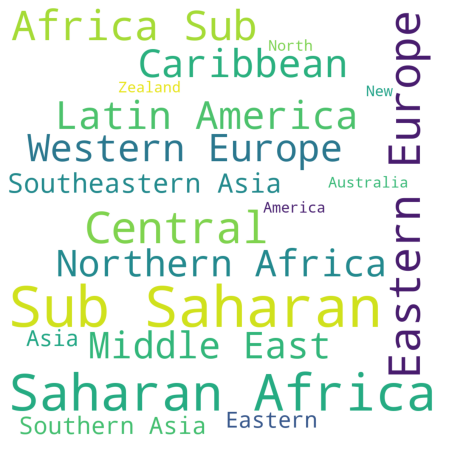

In [32]:
from wordcloud import WordCloud

word2015 = year2015
word2015 = word2015['Region']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2015))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

***How can we make sense of data using Word Cloud?***

The following three Word Clouds are representations of 3 pieces of data.
1. 0 to 50
2. 50 to 100
3. 100 to 153

**In the first 50 data, the dominance of America and Europe is observed, while Asia and the Middle East are dominant between 50-100, and Africa is dominant in the last 50 data.**

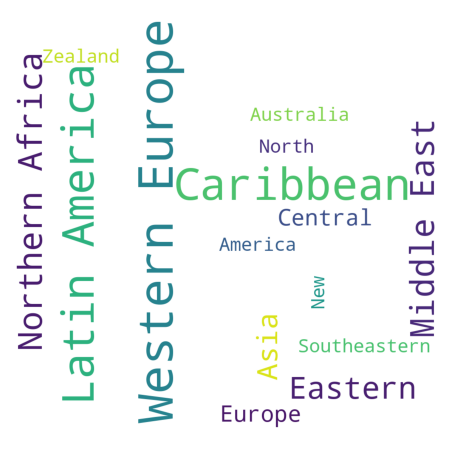

In [33]:
word2015 = year2015.iloc[:50,:]
word2015 = word2015['Region']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2015))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

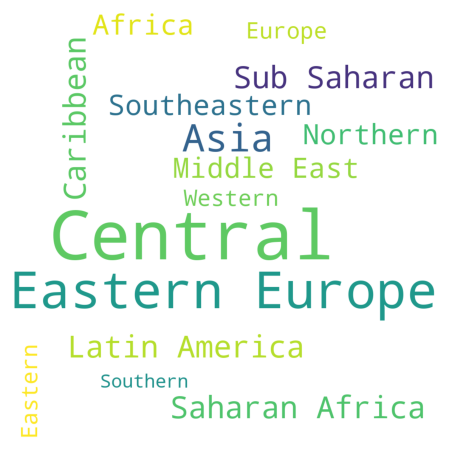

In [34]:
word2015 = year2015.iloc[50:100]
word2015 = word2015['Region']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2015))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

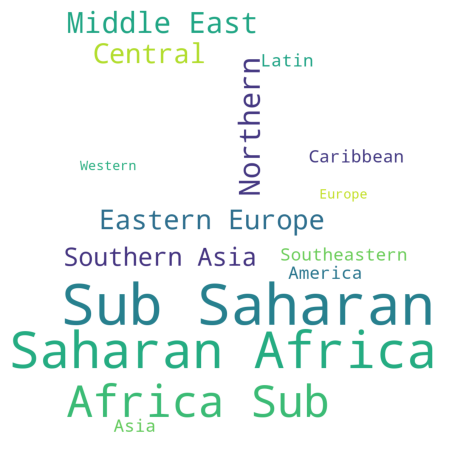

In [35]:
word2015 = year2015.iloc[100:153]
word2015 = word2015['Region']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=1024, height=1024).generate(" ".join(word2015))
plt.imshow(wordcloud)
plt.axis('off')


plt.show()

# Pie Charts

Pie Charts help show proportions and percentages across categories by dividing a circle into proportional parts. Each arc length represents a proportion of each category, while the full circle represents the sum of all data equal to 100%. Pie charts are ideal for giving the reader a quick idea of the proportional distribution of the data.

* fig
  * DATA    
      * values --> counts
      * labels --> labels
      * domain --> 
      * name --> 
      * hoverinfo --> hover attributes
      * hole --> the width of the hole
      * type --> Type of graph
  * LABEL
      * title --> Title of graph.
      * annotations -->
           * font --> Font
           * showarrow --> Arrow (on the right, below REGIONS)
           * text --> text for legend
           * x -->
           * y -->


In [36]:
# data preparation
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
df = year2016

pie1 = df.Country.value_counts()
labels = df.Region
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Countries by Regions",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Regions",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

***What did we do?***

* We calculated how many countries are in each region.
* We created the Label.
* We placed Value and Label.
* We determined layout and showed the figure.

# Treemap Charts

Treemaps are an alternative way of visualizing data under hierarchical structures by creating a region for each data category with tree-shaped charts. Each category represents a rectangle. Inside each rectangle are other rectangles that represent subcategories. When a value is placed in a category, its proportion indicates the size of the rectangle. Sub-categories combine to form a higher category. If a value is not assigned to the subcategories, this rectangle is the size of the rectangles that represent a subcategory within the larger rectangles that make up the other main categories. The arrangement of the rectangles is separated and organized depending on the sub-algorithm used.

In [37]:
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
df = year2016

In [38]:
import plotly.express as px
import numpy as np
df = year2016
df["world"] = "world" # in order to have a single root node
fig = px.treemap(df, path=['world','Region', 'Country'], values='Happiness Score',
                  color=df['Happiness Score'], hover_data=['Happiness Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Happiness Score'], weights=df['Happiness Score']))
fig.show()

***What did we do?***

* We created new column named 'world' and we made it all elements world. This is the parent.
* Second parents are Regions. Countries are childrens. We setted path.
* We setted color scale. Colors will change according to 'Happiness Score'. 
* We added 'Happiness Rank' to hover.



# Multiple Subplots

In [39]:
year2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', encoding="windows-1252")
df = year2016.iloc[:20]

trace1 = go.Scatter(
    x=df['Country'],
    y=df['Freedom'],
    name = "Freedom"
)
trace2 = go.Scatter(
    x=df['Country'],
    y=df['Family'],
    xaxis='x2',
    yaxis='y2',
    name = "Family"
)
trace3 = go.Scatter(
    x=df['Happiness Score'],
    y=df['Economy (GDP per Capita)'],
    xaxis='x3',
    yaxis='y3',
    name = "Economy"
)
trace4 = go.Scatter(
    x=df['Happiness Score'],
    y=df['Generosity'],
    xaxis='x4',
    yaxis='y4',
    name = "Generosity"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Freedom, Family, Economy and Generosity vs First 20 Country and Their Happiness Score - year = 2016'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Conclusion

I tried to explain some Plotly graphics. Examples can be expanded. 

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please UPVOTE.
* Thank you for your time.